 # Klasifikasi data MNIST dengan Logistic Regression, Naive Bayes, dan SVM

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import struct
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
train_images_path = r'Cache/train-images.idx3-ubyte'
train_labels_path = r'Cache/train-labels.idx1-ubyte' 
test_images_path = r'Cache/t10k-images.idx3-ubyte'
test_labels_path = r'Cache/t10k-labels.idx1-ubyte'


In [3]:
# Function Untuk Memuat Data MNIST
#1
def load_idx(filename):
    # Membuka file dalam mode binary read
    with open(filename, 'rb') as f:
        # Membaca 4 byte pertama dan mengurai header file (magic number, tipe data, dimensi)
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        # Membaca dimensi array berdasarkan jumlah dimensi yang ada di header
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        # Membaca sisa byte sebagai array numpy dan mengubah bentuknya sesuai dimensi
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
# menggunakan data MNIST untuk training dan testing
#2
x_train = load_idx(train_images_path)
y_train = load_idx(train_labels_path)
x_test = load_idx(test_images_path)
y_test = load_idx(test_labels_path)

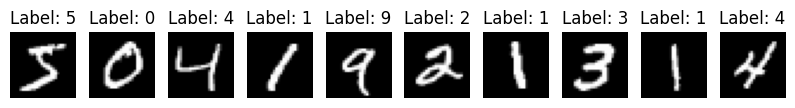

In [5]:
# Function Untuk Menampilkan Gambar MNIST
#3
# Fungsi untuk menampilkan gambar MNIST
def plot_images(images, labels, num_images):
    # Membuat figure dengan ukuran 10x2 inch
    plt.figure(figsize=(10, 2))
    
    # Loop untuk menampilkan sejumlah gambar yang diinginkan
    for i in range(num_images):
        # Membuat subplot dengan 1 baris dan num_images kolom
        plt.subplot(1, num_images, i + 1)
        # Menampilkan gambar dalam grayscale
        plt.imshow(images[i], cmap='gray')
        # Menambahkan label sebagai judul gambar
        plt.title(f'Label: {labels[i]}')
        # Mematikan sumbu x dan y
        plt.axis('off')
    # Menampilkan plot
    plt.show()

# Memanggil fungsi plot_images untuk menampilkan 5 gambar pertama dari dataset training
plot_images(x_train, y_train, 10)


**Noted:** Code #1, #2, #3 berasal dari https://www.kaggle.com/code/zeynepguney/mnist-ann

## Visualisasi dalam bentuk array


In [6]:
# visualisas dalam bentuk array
# [indeks ke-0 dari array x_train, baris awal:baris akhir, kolom awal:kolom akhir]
print(f"Label: {y_train[0]}")
print(x_train[0, 4:-2, 6:-4]) 



Label: 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127]
 [  0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64]
 [  0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0]
 [  0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0]
 [  0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0   0]
 [  0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0   0]
 [  0   0   0   

In [7]:
# visualisas dalam bentuk array
# [indeks ke-0 dari array x_train, baris awal:baris akhir, kolom awal:kolom akhir]
print(f"Label: {y_train[1]}")
print(x_train[1, 3:-3, 6:-5]) 

Label: 0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0]
 [  0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0]
 [  0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0]
 [  0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0]
 [  0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0]
 [  0   0   0   0  51 238 253 253 190 114 253 228  47  79 255 168   0]
 [  0   0   0  48 238 252 252 179  12  75 121  21   0   0 253 243  50]
 [  0   0  38 165 253 233 208  84   0   0   0   0   0   0 253 252 165]
 [  0   7 178 252 240  71  19  28   0   0   0   0   0   0 253 252 195]
 [  0  57 252 252  63   0   0   0   0   0   0   0   0   0 253 252 195]
 [  0 198 253 190   0   0   0   0   0   0   0   0   0   0 255 253 196]
 [ 76 246 252 112   0   0   0   0   0   0   0   0   0   0 253 252 148]
 [ 85 252 230  25   0   0   0   0   0   0   0   0   7 135 253 186  1

In [8]:
# visualisas dalam bentuk array
# [indeks ke-0 dari array x_train, baris awal:baris akhir, kolom awal:kolom akhir]
print(f"Label: {y_train[2]}")
print(x_train[2, 4:-2, 5:-5]) 

Label: 4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39]
 [ 81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39]
 [163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40]
 [163   0   0   0   0   0   0   0   0   0   0   0   0   0  27 254 162   0]
 [163   0   0   0   0   0   0   0   0   0   0   0   0   0 183 254 125   0]
 [163   0   0   0   0   0   0   0   0   0   0   0   0   0 198 254  56   0]
 [163   0   0   0   0   0   0   0   0   0   0   0   0  23 231 254  29   0]
 [120   0   0   0   0   0   0   0   0   0   0   0   0 163 254 216  16   0]
 [ 67   0   0   0   0   0   0   0   0   0  14  86 178 248 254  91   0   0]
 [ 85   0   0   0  47  49 116 144 150 241 243 234 179 241 252  40   0   0]
 [237 207 207 207 253 254 250 240 198 143  91  28   5 233 250   0   0   0]
 [177 177 177 177 177  98  56   0   0   0   0   0 102 254 220   0   0   0]
 [  0   0   0   

In [9]:
# visualisas dalam bentuk array
# [indeks ke-0 dari array x_train, baris awal:baris akhir, kolom awal:kolom akhir]
print(f"Label: {y_train[3]}")
print(x_train[3, 4:-2, 5:-5]) 

Label: 1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0]
 [  0   0   0   0   0   0   0   0   0   0   0  68 236 251 211  31   8   0]
 [  0   0   0   0   0   0   0   0   0   0  60 228 251 251  94   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 155 253 253 189   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20 253 251 235  66   0   0   0   0]
 [  0   0   0   0   0   0   0   0  32 205 253 251 126   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 104 251 253 184  15   0   0   0   0   0]
 [  0   0   0   0   0   0   0  80 240 251 193  23   0   0   0   0   0   0]
 [  0   0   0   0   0   0  32 253 253 253 159   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 151 251 251 251  39   0   0   0   0   0   0   0]
 [  0   0   0   

In [10]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('x_train shape:', y_train.shape)
print('x_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
x_train shape: (60000,)
x_test shape: (10000,)


data berbentuk 3 dimensi yaitu X train dan X test

## Training Model Logistic Regression, Naive Bayes, dan SVM


## Spliting Data

Melakukan proses sliting data MNIST

In [11]:
X_train=x_train.reshape(-1, 28 * 28)
X_test=x_test.reshape(-1, 28 * 28)

In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


mengubah bentuk data yang awalnya berbentuk 3 dimensi menjadi data 2 dimensi

In [13]:
scaler = StandardScaler()
X_train_minimax = scaler.fit_transform(X_train)
X_test_minimax = scaler.transform(X_test)

Sumber code: https://www.kaggle.com/code/ashrafulislamparan/svm-on-mnist

In [14]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Logistic Regression

training model logistic regression menggunakan data MNIST


In [57]:
# # Inisiasi model Logistic Regression dengan solver 'lbfgs' yang cocok untuk dataset besar
# logreg = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='ovr')

# # logistic regression softmax
# logreg_softmax = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial')

**Noted:** ovr ialah model akan membuat satu klasifikasi untuk setiap kelas, dengan menganggapnya sebagai masalah biner melawan semua kelas lain.

In [58]:
# # Melatih model
# logreg.fit(X_train, y_train)
# logreg_softmax.fit(X_train, y_train)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'mul

LogisticRegression(multi_class='multinomial')

In [59]:
# # multiclass One-vs-Rest
# logreq_multiclass_ovr = "Util/logreq_multiclass_ovr.pkl"
# joblib.dump(logreg, logreq_multiclass_ovr)

# # multiclass softmax/multinomial
# logreq_multiclass_softmax = "Util/logreq_multiclass_softmax.pkl"
# joblib.dump(logreg_softmax, logreq_multiclass_softmax)

['Util/logreq_multiclass_softmax.pkl']

In [60]:
#  melakukan proses prediksi
# logreg OVR
logreg_ovr=joblib.load('Util/logreq_multiclass_ovr.pkl')
pred_logreg_ovr = logreg_ovr.predict(X_test_minimax)
# Evaluate accuracy
accuracy_logreg_ovr = accuracy_score(y_test, pred_logreg_ovr)


#  Logreg Softmax/multinomial
logreg_multinomial=joblib.load('Util/logreq_multiclass_softmax.pkl')
pred_logreg_multinomial = logreg_multinomial.predict(X_test_minimax)
# Evaluate accuracy
accuracy_logreg_multinomial = accuracy_score(y_test, pred_logreg_multinomial)

In [61]:
# melakukan perbandingan tingkat akurasi
print(f"Accuracy lgostic reggresion Ovr: {accuracy_logreg_ovr * 100:.2f}%")
print(f"Accuracy lgostic reggresion softmax: {accuracy_logreg_multinomial * 100:.2f}%")

Accuracy lgostic reggresion Ovr: 74.85%
Accuracy lgostic reggresion softmax: 77.83%


### SVM

training model logistic regression menggunakan data MNIST


In [15]:
# # menggunakan kernel SVM linier
# svm_linear = SVC(kernel='linear')

# # fit
# svm_linear.fit(X_train_minimax, y_train)

In [16]:
# y_pred_linier = svm_linear.predict(X_test_minimax)

# # Evaluate accuracy
# accuracy_lnier = accuracy_score(y_test, y_pred_linier)
# print(f"Accuracy: {accuracy_lnier * 100:.2f}%")

In [17]:
# # Menyimpan model ke dalam file
# model_filename = "Util/svm_linear.pkl"
# with open(model_filename, 'wb') as f:
#     pickle.dump(svm_linear, f)

**Noted:** model svm dengan menggunakan kernel linear tanpa menggunakan parameter

In [18]:
# # menggunakan kernel SVM Radial Basis Function
# svm_rbf = SVC(kernel='rbf')

# # fit
# svm_rbf.fit(X_train_minimax, y_train)

In [19]:
# pred_svm_rbf = svm_rbf.predict(X_test_minimax)

# # Evaluate accuracy
# accuracy_rbf = accuracy_score(y_test, pred_svm_rbf)
# print(f"Accuracy: {accuracy_rbf * 100:.2f}%")

In [20]:
# # Menyimpan model ke dalam file
# rbf = "Util/svm_rbf.pkl"
# with open(rbf, 'wb') as f:
#     pickle.dump(svm_rbf, f)

**Noted:** model svm dengan menggunakan kernel RBF tanpa menggunakan parameter

#### model dengan menggunakan parameter

In [21]:
# menggunakan kernel SVM linier
# svm_linear_parameter = SVC(kernel='linear', C=10, gamma=0.001)

# # fit
# svm_linear_parameter.fit(X_train_minimax, y_train)

In [22]:
# # Menyimpan model ke dalam file
# model_svm_parameter = "Util/svm_linear_parameter.pkl"
# with open(model_svm_parameter, 'wb') as f:
#     pickle.dump(svm_linear_parameter, f)

In [23]:
# # menggunakan kernel SVM linier
# svm_rbf_parameter = SVC(kernel='rbf', C=10, gamma=0.001)

# # fit
# svm_rbf_parameter.fit(X_train_minimax, y_train)

In [24]:
# # Menyimpan model ke dalam file
# model_svm_rbf_parameter = "Util/svm_rbf_parameter.pkl"
# with open(model_svm_rbf_parameter, 'wb') as f:
#     pickle.dump(svm_rbf_parameter, f)


**Noted:** Untuk parameter diambil dari sumber link berikut
https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm
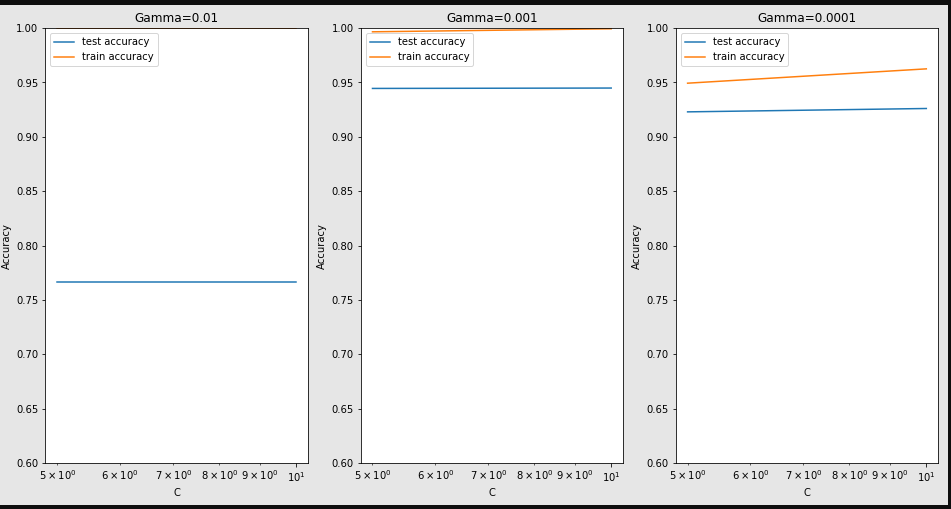

In [25]:
# Non Parameter
# SVM kernel linear
linear=joblib.load('Util/svm_linear.pkl')
pred_linear = linear.predict(X_test_minimax)
# Evaluate accuracy
accuracy_lnier = accuracy_score(y_test, pred_linear)

# Svm kernel RBF
rbf=joblib.load('Util/svm_rbf.pkl')
pred_rbf = rbf.predict(X_test_minimax)
# Evaluate accuracy
accuracy_rbf = accuracy_score(y_test, pred_rbf)



In [26]:
# melakukan perbandingan tingkat akurasi
print(f"Accuracy SVM linear (non-parameter): {accuracy_lnier * 100:.2f}%")
print(f"Accuracy SVM rbf (non-parameter): {accuracy_rbf * 100:.2f}%")

Accuracy SVM linear (non-parameter): 92.93%
Accuracy SVM rbf (non-parameter): 96.60%


In [27]:
# Parameter
# SVM kernel linear
linear_parameter=joblib.load('Util/svm_linear_parameter.pkl')
pred_linear_parameter = linear_parameter.predict(X_test_minimax)
# Evaluate accuracy
accuracy_linear_parameter = accuracy_score(y_test, pred_linear_parameter)

# Svm kernel RBF
rbf_parameter=joblib.load('Util/svm_rbf_parameter.pkl')
pred_rbf_parameter = rbf_parameter.predict(X_test_minimax)
# Evaluate accuracy
accuracy_rbf_parameter = accuracy_score(y_test, pred_rbf_parameter)

In [28]:
# melakukan perbandingan tingkat akurasi
print(f"Accuracy SVM linear (parameter): {accuracy_linear_parameter * 100:.2f}%")
print(f"Accuracy SVM rbf (parameter): {accuracy_rbf_parameter * 100:.2f}%")

Accuracy SVM linear (parameter): 92.66%
Accuracy SVM rbf (parameter): 97.33%


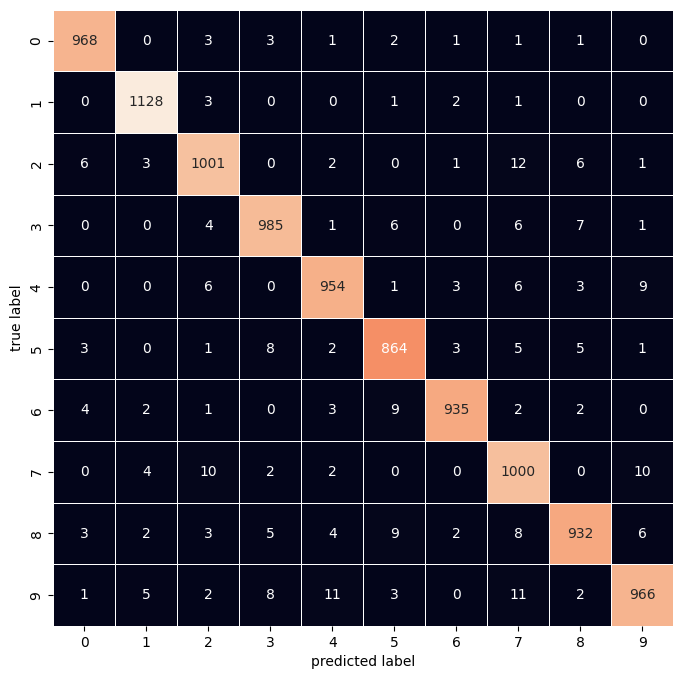

In [29]:
plot_confusion_matrix(y_test, pred_rbf_parameter)

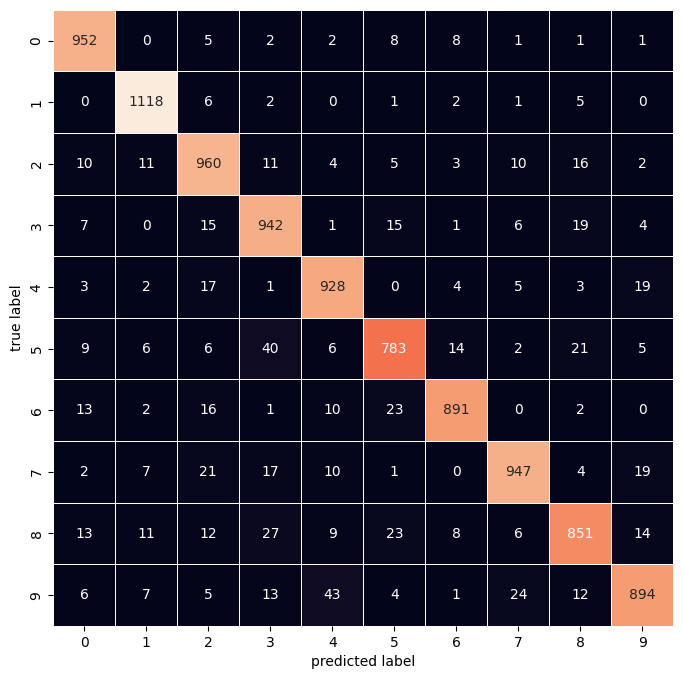

In [30]:
plot_confusion_matrix(y_test, pred_linear_parameter)

### Naive Bayes

training model naive bayes terdiri dari (gaussian dan multinomial)

In [46]:
# # Training model Gaussian dan multinomial
# gnb = GaussianNB()
# mnb = MultinomialNB()
# brnNB= BernoulliNB()

In [37]:

# #  Pelatihan Model
# gnb.fit(X_train_minimax, y_train)

GaussianNB()

In [38]:
# # Pelatihan model multinomialNB
# X_train_positive = np.maximum(0, X_train_minimax)  # Convert negative values to 0
# mnb.fit(X_train_positive, y_train)

MultinomialNB()

**Noted:** X_train_positive berfungsi untuk mengubag data X_train_minimax memiliki nilai maximum 0, jadi nilai yang berada dibawah 0 akan diubah menjadi 0

In [47]:
# # Pelatihan model BernoulliNB
# brnNB.fit(X_train_minimax, y_train)

BernoulliNB()

In [40]:
# # Menyimpan model Gaussian NB
# model_gauss = "Util/multinomial.pkl"
# joblib.dump(gnb, model_gauss)

# # menyimpan model multinomial NB
# model_multinomial = "Util/gaussian.pkl"
# joblib.dump(mnb, model_multinomial)

['Util/gaussian.pkl']

In [48]:
# # menyimpan model BernoulliNB
# model_BernoulliNB = "Util/Bernoulli.pkl"
# joblib.dump(brnNB, model_BernoulliNB)

['Util/Bernoulli.pkl']

In [49]:

#  Gaussian Naive Bayes
gauss=joblib.load('Util/gaussian.pkl')
pred_gaussian = gauss.predict(X_test_minimax)
# Evaluate accuracy
accuracy_gaussianNB = accuracy_score(y_test, pred_gaussian)

# multinomial Naive Bayes
multinom=joblib.load('Util/multinomial.pkl')
pred_mutinomial = multinom.predict(X_test_minimax)
# Evaluate accuracy
accuracy_multinomialNB = accuracy_score(y_test, pred_mutinomial)

#  Bernoulli naive bayes
bernoulli=joblib.load('Util/Bernoulli.pkl')
pred_bernoulli = bernoulli.predict(X_test_minimax)
# Evaluate accuracy
accuracy_bernoulliNB = accuracy_score(y_test, pred_bernoulli)

In [50]:
# melakukan perbandingan tingkat akurasi
print(f"Accuracy Gaussian Naive Bayes: {accuracy_gaussianNB * 100:.2f}%")
print(f"Accuracy Multinomial Naive bayes: {accuracy_multinomialNB * 100:.2f}%")
print(f"Accuracy Multinomial Naive bayes: {accuracy_bernoulliNB * 100:.2f}%")

Accuracy Gaussian Naive Bayes: 61.26%
Accuracy Multinomial Naive bayes: 52.40%
Accuracy Multinomial Naive bayes: 83.83%


**Noted:** Dari ketiga mode naive bayes yang digunakan bernoulli mengahsilkan akkurasi yang paling tinggi yaitu 83%, sedangkan untuk akurasi paling kecil adalah multinomial naive bayes sebesar 52%